In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 5.5 MB/s 
     |████████████████████████████████| 9.5 MB 27.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('Processed_DJI.csv',index_col='Date',parse_dates=True)
df=df.dropna()
df = df.drop('Name', axis =1)
print('Shape of data',df.shape)
df.head()

Shape of data (1114, 82)


,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-19,10978.620117,0.062238,-0.014813,0.007314,-0.002865,-0.000136,-0.379118,0.309742,1.109587,2.022017,11014.144401,10913.500141,10698.491934,10512.619611,0.14,0.14,0.18,1.11,2.50,-0.042018,-0.020662,4.70,5.75,-0.012013,0.004237,0.015603,0.000060,-0.026761,-0.029897,-0.011077,-0.008926,-0.013351,-0.027885,-0.012867,-0.017501,-0.007127,-0.006722,-0.003981,-0.015877,0.012542,...,-0.022503,-0.019475,2.36,2.36,2.32,0.0,0.04,1.05,3.25,5.57,5.61,5.61,0.000000,-0.026316,-0.026316,-2.09,-3.88,-0.73,-2.47,-4.32,-0.44,-0.92,-1.53,-0.72,-2.63,1.55,-1.21,-1.29,2.39,0.42,-1.84,-2.59,-1.74,-1.23,1.27,1.66,1.62,-2.58,-4.14,-2.51
2010-10-20,11107.969727,-0.216333,0.011782,-0.014813,0.007314,-0.002865,0.107152,1.279393,2.516681,3.432811,11031.203551,10932.021053,10714.549887,10518.543493,0.14,0.14,0.17,1.11,2.51,0.029659,0.000000,4.69,5.74,0.009048,-0.005972,-0.010358,0.000889,0.003360,0.000000,-0.001245,0.004898,0.010878,0.008366,0.042770,0.013667,0.005511,0.004383,0.005217,0.010524,-0.008720,...,0.011467,0.013492,2.37,2.37,2.34,0.0,0.03,1.05,3.23,5.57,5.60,5.60,-0.055556,-0.054054,0.000000,1.83,3.08,0.58,0.88,2.87,0.61,1.10,1.69,0.39,0.61,-1.05,0.79,0.79,0.74,-1.57,1.40,1.03,0.91,0.94,-1.01,-1.29,-1.29,2.52,2.44,0.82
2010-10-21,11146.570313,-1.527112,0.003475,0.011782,-0.014813,0.007314,0.468698,1.808364,3.323312,4.540718,11052.179326,10952.454316,10731.491864,10524.792516,0.13,0.13,0.18,1.15,2.57,-0.023191,0.003361,4.71,5.77,-0.008406,0.003023,0.003521,-0.000256,-0.003252,0.039705,0.003115,0.006132,-0.010499,0.004346,0.016797,0.004696,0.013093,0.005062,0.013251,0.001774,0.003947,...,-0.005683,-0.001082,2.44,2.44,2.39,0.0,0.05,1.06,3.20,5.59,5.64,5.64,0.058824,0.057143,0.036036,-0.89,-2.12,1.31,-0.32,-1.48,1.16,0.18,-0.34,0.60,-1.38,0.50,0.41,-0.18,-4.83,-0.11,-0.98,-3.69,-0.53,0.09,0.64,0.28,0.32,-3.09,-3.26,-1.55
2010-10-26,11169.459961,-0.559593,0.000485,0.002829,-0.001257,0.003475,1.738286,1.352579,2.053412,2.867161,11099.928288,11005.395486,10779.483676,10543.432281,0.14,0.14,0.18,1.27,2.67,0.007317,-0.005981,4.78,5.80,0.008939,0.006335,0.004120,0.000496,-0.002558,0.005621,0.006227,-0.002188,0.003507,0.028186,0.007387,0.004985,-0.004481,-0.007771,-0.003827,0.000017,-0.001129,...,-0.001356,-0.002065,2.53,2.53,2.49,0.0,0.04,1.02,3.13,5.62,5.66,5.66,0.000000,0.081081,0.058333,-0.56,0.14,-0.57,0.18,0.04,-0.25,0.08,-0.75,-0.79,-0.02,-0.56,-0.08,0.36,1.12,-0.74,-0.52,2.42,-0.23,0.00,1.17,0.79,0.79,3.65,0.85,-0.04
2010-10-27,11126.280273,0.779029,-0.003866,0.000485,0.002829,-0.001257,0.164842,0.272170,1.446343,2.685671,11104.719558,11016.908323,10793.083542,10549.231763,0.14,0.14,0.18,1.34,2.75,-0.008475,-0.003761,4.80,5.84,-0.004795,0.004205,0.004338,0.002691,-0.000714,-0.014357,-0.003094,-0.004229,0.009140,0.005791,-0.006175,-0.012927,-0.009575,-0.010741,-0.006925,-0.002691,-0.018502,...,-0.003819,-0.006630,2.61,2.61,2.57,0.0,0.04,1.04,3.09,5.66,5.70,5.70,0.000000,0.000000,0.055118,-1.37,-0.51,-0.94,-2.36,-0.74,-0.80,-0.47,-0.66,-1.04,-1.18,-2.12,-0.74,0.37,-1.85,0.53,0.03,-2.97,-0.26,-0.34,0.47,0.60,0.57,0.61,-1.22,-1.09


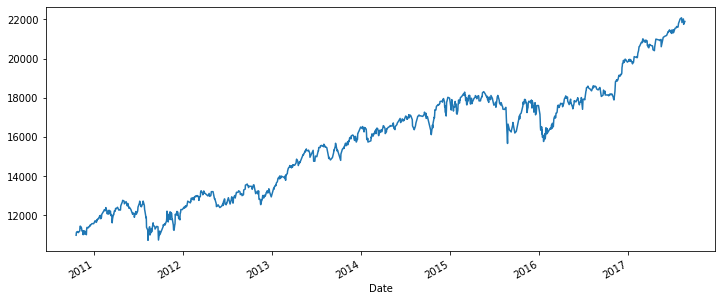

In [ ]:
df['Close'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['Close'])

1. ADF :  -0.15224108549393
2. P-Value :  0.9439800633853632
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1111
5. Critical Values :
	 1% :  -3.436249615899632
	 5% :  -2.864144989576945
	 10% :  -2.5681569742149732


In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1114
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -7183.013
Date:                Sun, 08 Aug 2021   AIC                          14372.027
Time:                        10:20:13   BIC                          14387.071
Sample:                             0   HQIC                         14377.715
                               - 1114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.6186      4.437      2.393      0.017       1.922      19.316
ma.L1         -0.0903      0.021     -4.349      0.000      -0.131      -0.050
sigma2      2.368e+04    491.592     48.164      0.000    2.27e+04    2.46e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2834.99
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
df.shape

(1114, 82)

In [ ]:
print(df.shape)
train=df.iloc[:800]
test=df.iloc[801:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1114, 82)
(800, 82) (313, 82)
Close             16739.949219
Volume              -16.215753
mom                   0.008440
mom1                  0.013981
mom2                 -0.003781
                      ...     
Dollar index-F       -0.240000
Dollar index         -0.200000
wheat-F              -1.210000
XAG                   3.400000
XAU                   1.280000
Name: 2015-09-16 00:00:00, Length: 82, dtype: float64 Close             21899.890625
Volume               -0.988463
mom                   0.009037
mom1                  0.001349
mom2                 -0.003504
                      ...     
Dollar index-F        0.480000
Dollar index          0.490000
wheat-F              -1.710000
XAG                  -0.380000
XAU                  -0.650000
Name: 2017-08-22 00:00:00, Length: 82, dtype: float64


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Close'],order=(0,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  799
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -5152.012
Method:                       css-mle   S.D. of innovations            152.800
Date:                Sun, 08 Aug 2021   AIC                          10310.024
Time:                        10:25:23   BIC                          10324.074
Sample:                             1   HQIC                         10315.422
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.6783      4.901      1.363      0.173      -2.928      16.284
ma.L1.D.Close    -0.0935      0.037     -2.533      0.011      -0.166      -0.021
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           10.6977           +0.0000j           10.6977            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
test

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-16,16739.949219,-16.215753,0.008440,0.013981,-0.003781,0.006288,2.992443,4.244518,6.852283,-4.405092,16482.209083,16584.279399,17005.194955,17436.669808,-0.01,0.06,0.24,1.62,2.30,0.056976,0.010534,4.18,5.45,0.011282,0.000739,-0.005738,0.000142,0.001118,0.009610,0.024901,0.002225,0.008808,0.007276,0.004676,0.019764,0.016735,0.014924,0.003836,0.008705,0.023837,...,0.007890,0.012948,2.31,2.24,2.06,0.07,0.25,1.27,3.15,5.21,5.39,5.46,-0.111111,0.000000,0.006211,0.78,6.69,1.70,1.07,5.74,0.25,0.87,0.20,1.50,-0.43,3.03,2.62,0.70,-2.49,1.45,0.24,3.90,0.83,0.93,-0.24,-0.24,-0.20,-1.21,3.40,1.28
2015-09-17,16674.740234,-0.793210,-0.003895,0.008440,0.013981,-0.003781,2.108582,1.977572,2.390042,-3.884954,16517.214747,16592.894716,16992.235947,17429.088419,-0.01,0.01,0.16,1.50,2.21,-0.004032,-0.000089,4.09,5.39,0.003285,-0.003958,0.000532,-0.000770,-0.021390,0.021768,-0.022368,0.002431,-0.023230,-0.001129,-0.028109,0.002153,0.002002,-0.006775,0.000232,-0.002561,-0.005100,...,0.004672,-0.002069,2.22,2.20,2.05,0.02,0.17,1.30,3.18,5.23,5.38,5.40,-0.333333,-0.146341,-0.074074,-0.33,-1.35,0.23,0.00,-0.53,0.06,-0.64,1.30,-0.67,-0.17,-1.14,0.29,-0.26,-0.30,1.21,-0.31,0.65,-0.01,-0.53,-1.16,-0.91,-0.91,-1.64,1.54,1.06
2015-09-23,16279.889648,0.326243,-0.003097,-0.010885,0.007666,-0.017401,-2.748273,0.161930,1.379594,3.915690,16432.221202,16519.330537,16900.782028,17387.782672,-0.03,0.01,0.09,1.47,2.16,-0.035521,0.007525,4.00,5.31,-0.006635,0.000999,0.003918,0.001210,0.008113,-0.004328,0.001195,-0.002681,-0.004433,-0.000683,0.001775,-0.006049,0.000976,0.016241,0.004384,-0.002049,-0.022649,...,-0.002607,-0.004509,2.19,2.15,2.07,0.04,0.12,1.31,3.15,5.22,5.30,5.34,-0.100000,0.014493,0.020833,-1.21,-2.71,0.10,-0.09,-2.95,0.54,-0.26,0.60,1.60,0.59,-1.29,-1.22,-0.11,-0.31,0.54,-0.32,0.20,-0.45,-0.18,0.47,-0.25,-0.22,2.47,0.14,0.50
2015-09-24,16201.320313,0.332926,-0.004826,-0.003097,-0.010885,0.007666,-2.839144,-0.790428,-0.917718,-0.516959,16390.239222,16489.043849,16873.352157,17375.977077,-0.03,0.01,0.09,1.44,2.13,0.009207,0.020462,3.99,5.29,-0.001644,0.000333,0.001051,-0.000063,0.005948,-0.004328,-0.009149,-0.005484,-0.006926,0.000912,-0.004529,0.005947,-0.019308,-0.011720,-0.019244,-0.003363,-0.009714,...,-0.002202,-0.003049,2.16,2.12,2.04,0.04,0.12,1.30,3.16,5.20,5.28,5.32,0.000000,-0.042857,-0.020408,0.30,0.88,-1.96,0.30,0.97,-2.13,-0.54,0.38,-1.33,1.96,-0.62,-0.30,-0.39,0.86,-0.82,1.32,2.33,-0.21,-0.51,-0.47,-0.06,0.65,-2.07,2.43,2.09
2015-09-30,16284.700195,-0.139430,0.014678,0.002952,-0.019172,0.006996,0.029549,-2.719536,0.191526,1.409551,16265.514134,16381.397215,16768.234382,17328.397569,-0.02,-0.01,0.08,1.37,2.06,-0.003979,-0.015988,4.00,5.35,-0.002238,-0.000008,-0.007601,-0.001023,0.011370,0.031891,0.026455,0.003332,0.018884,0.018877,0.009039,0.018912,0.025683,0.025790,0.022226,0.019076,0.014093,...,0.015481,0.018460,2.08,2.07,1.98,0.01,0.10,1.35,3.29,5.27,5.36,5.37,-0.111111,0.000000,0.000000,0.49,0.29,2.58,4.08,-0.31,2.04,1.40,-0.64,2.18,-1.03,1.55,0.66,2.17,-2.40,2.66,0.76,-0.38,1.62,1.83,0.17,0.51,0.51,1.66,-0.75,-1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-09,22048.699219,-0.697099,-0.001659,-0.001496,

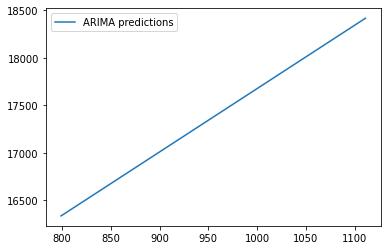

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
#test['Close'].plot(legend=True)

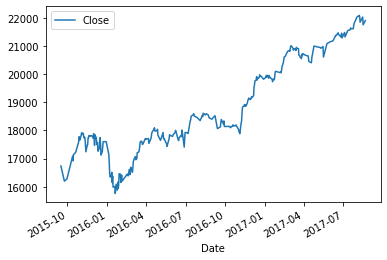

In [ ]:
actual = test['Close']
actual.plot(legend = True)